# EDA

In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
#Let's import the cleaned file
df = pd.read_excel('Data/Main_Data.xlsx')
df.head()

,Decade,Year,Date,Location,Operator,manufacturer,Registration,Origin,Route,AC_Type,...,Crew_Aboard,Aboard_Aircraft,Passengers_Fatalities,Crew_Fatalities,Aboard_Fatalities,Ground_Fatalities,Total_Fatalites,Survivors,Latitude_DD,Longitude_DD
0,1980,1987,1987-10-20,"Indianapolis, Indiana",Military - U.S. Air Force,A-7D,Unknown,"Pittsburgh, PA","Pittsburg, PA- Nellis AFB",A-7D Corsair,...,11.0,11.0,0.0,10.0,10.0,10.0,20.0,1.0,NaN,NaN
1,1940,1946,1946-11-01,"St Leger-la-Montagne, France",CTA Languedoc Roussillon,AAC-1,F-BCAD,Paris,Paris- Toulouse- Casablanca,AAC-1 Toucan,...,3.0,27.0,20.0,3.0,23.0,0.0,23.0,4.0,NaN,NaN
2,1920,1928,1928-06-14,"Frankfurt, Germany",Deutsche Lufthansa,AEGK,D-74,Unknown,Unknown,AEGK,...,1.0,5.0,4.0,1.0,5.0,0.0,5.0,0.0,NaN,NaN
3,1950,1956,1956-04-09,"Skilak Lake, Alaska",Cordova Airlines,Aero,B5386N,"Anchorage, AK",Anchorage- Seward,Aero Commander 520,...,1.0,6.0,5.0,1.0,6.0,0.0,6.0,0.0,NaN,NaN
4,1970,1971,1971-05-28,"Roanoke, Virginia",Private,Aero,N601JJ,Atlanta,"Atlanta, GA- Martinsville, VA",Aero Commander 680E,...,1.0,6.0,5.0,1.0,6.0,0.0,6.0,0.0,NaN,NaN


In [3]:
#checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Decade                 5043 non-null   int64         
 1   Year                   5043 non-null   int64         
 2   Date                   5043 non-null   datetime64[ns]
 3   Location               5043 non-null   object        
 4   Operator               5043 non-null   object        
 5   manufacturer           5043 non-null   object        
 6   Registration           5043 non-null   object        
 7   Origin                 5043 non-null   object        
 8   Route                  5043 non-null   object        
 9   AC_Type                5043 non-null   object        
 10  Summary                5043 non-null   object        
 11  Passengers_Aboard      4820 non-null   float64       
 12  Crew_Aboard            4822 non-null   float64       
 13  Abo

### percentage of missing values

In [4]:
missing_data = df.isnull().sum() / len(df) *100
missing_data.sort_values(ascending=False)

Longitude_DD             86.416815
Latitude_DD              86.416815
Passengers_Fatalities     4.719413
Crew_Fatalities           4.719413
Passengers_Aboard         4.421971
Crew_Aboard               4.382312
Total_Fatalites           0.892326
Ground_Fatalities         0.892326
Aboard_Aircraft           0.337101
Survivors                 0.337101
Aboard_Fatalities         0.158636
Operator                  0.000000
Date                      0.000000
Location                  0.000000
manufacturer              0.000000
Registration              0.000000
Year                      0.000000
Summary                   0.000000
AC_Type                   0.000000
Route                     0.000000
Origin                    0.000000
Decade                    0.000000
dtype: float64

#### looks like we have a lot of occurences where the location is not known

In [5]:
#quick overview on the numbers
df.describe()

,Decade,Year,Passengers_Aboard,Crew_Aboard,Aboard_Aircraft,Passengers_Fatalities,Crew_Fatalities,Aboard_Fatalities,Ground_Fatalities,Total_Fatalites,Survivors,Latitude_DD,Longitude_DD
count,5043.000000,5043.000000,4820.000000,4822.000000,5026.000000,4805.000000,4805.000000,5035.000000,4998.000000,4998.000000,5026.000000,685.000000,685.000000
mean,1966.381122,1970.984731,26.906432,4.526752,31.132511,18.938189,3.585016,22.302085,1.717887,24.089236,8.805014,30.164963,-2.243981
std,24.979387,24.750520,44.003831,3.788049,45.435852,34.064868,3.180803,35.001043,55.308602,66.457303,30.591850,23.403421,77.465658
min,1900.000000,1908.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-77.425000,-171.708056
25%,1950.000000,1951.000000,3.000000,2.000000,7.000000,1.000000,2.000000,4.000000,0.000000,4.000000,0.000000,18.006111,-75.991389
50%,1970.000000,1970.000000,12.000000,4.000000,16.000000,7.000000,3.000000,11.000000,0.000000,12.000000,0.000000,37.873333,5.163889
75%,1990.000000,1992.000000,30.000000,6.000000,35.000000,21.000000,5.000000,25.000000,0.000000,26.000000,4.000000,45.366667,48.350000
max,2020.000000,2023.000000,614.000000,83.000000,644.000000,560.000000,43.000000,583.000000,2750.000000,2842.000000,516.000000,78.214167,175.800000


In [6]:
# How many fatalities
df['Total_Fatalites'].sum()

120398.0

### In total, there were 120398 casualties.

# Fatalities Trend

In [50]:
# Worst years in aviation
fatalities_by_year = df.groupby(by=['Year']).sum()
fatalities_by_year['Total_Fatalites'].sort_values(ascending=False)


Year
2001    6977.0
1972    2850.0
1996    2600.0
1985    2591.0
1973    2339.0
         ...  
1924      20.0
1912       5.0
1908       1.0
1909       1.0
2023       0.0
Name: Total_Fatalites, Length: 113, dtype: float64

## Let's create some visualizations to help with the analyzes

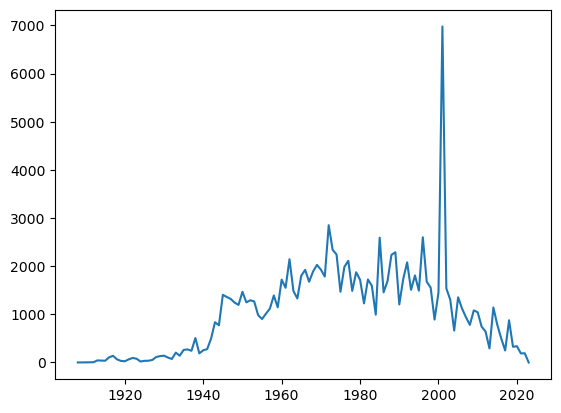

In [44]:
#trend of fatalities per year
sn.lineplot(x=fatalities_by_year.index, y='Total_Fatalites', data=fatalities_by_year)
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.show()

#### 2001 had a significant number of fatalities, this can be easily explained by the atrocious 9/11 attacks

# Aciddents per year

In [13]:
accidents_by_year = df.groupby(by=['Year']).count()
accidents_by_year['Date'].sort_values(ascending=False)

Year
1946    88
1989    83
1947    82
1962    79
1948    78
        ..
1915     2
1908     1
1909     1
1912     1
2023     1
Name: Date, Length: 113, dtype: int64

### Accidents per decade

In [15]:
df['Decade'] = df['Date'].dt.year.floordiv(10) * 10
Fatalies_by_decade = df.groupby(by=['Decade']).count()
Fatalies_by_decade['Total_Fatalites'].sort_values(ascending=False)

Decade
1960    649
1950    639
1990    633
1970    612
1940    572
1980    562
2000    509
1930    350
2010    236
1920    181
1910     31
2020     22
1900      2
Name: Total_Fatalites, dtype: int64

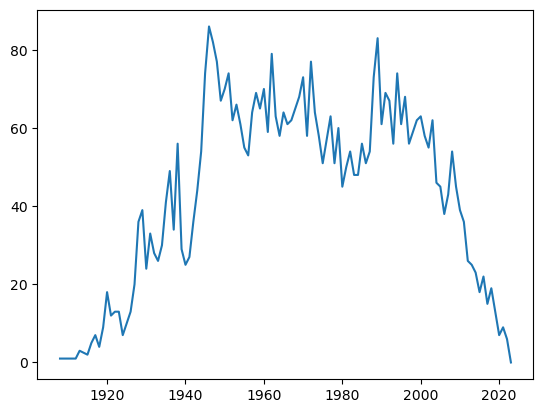

In [43]:
#trend of occurences per year
sn.lineplot(x=accidents_by_year.index, y='Total_Fatalites', data=accidents_by_year)
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.show()

# Ac_Type involved in more accidents

In [24]:
AC_Type_c = df.groupby("AC_Type").size().reset_index(name='AC_Type_c')
AC_Type_c = AC_Type_c.sort_values(by='AC_Type_c', ascending=False)
AC_Type_top = AC_Type_c.head(10)
AC_Type_top

,AC_Type,AC_Type_c
1130,Douglas DC-3,333
2406,de Havilland Canada DHC-6 Twin Otter 300,83
1042,Douglas C-47A,70
1031,Douglas C-47,64
1182,Douglas DC-4,41
145,Antonov AN-26,35
2356,Yakovlev YAK-40,35
1588,Junkers JU-52/3m,30
1199,Douglas DC-6B,27
1067,Douglas C-47B,27


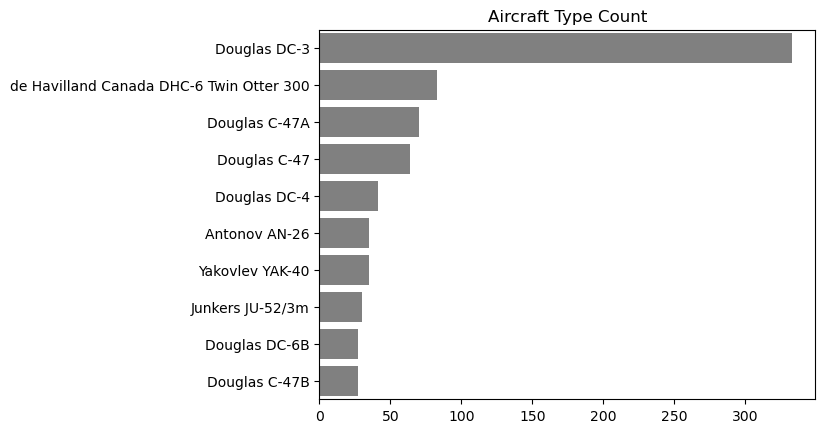

In [42]:
sn.barplot(x='AC_Type_c', y='AC_Type', data=AC_Type_top, orient='h', color="grey")
plt.title('Aircraft Type Count')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [33]:
AC_man_c = df.groupby("manufacturer").size().reset_index(name='manufacturer_c')
AC_man_c = AC_man_c.sort_values(by='manufacturer_c', ascending=False)
AC_man_c = AC_man_c.head(10)
AC_man_c

,manufacturer,manufacturer_c
78,Douglas,995
33,Boeing,415
138,Lockheed,329
246,de Havilland Canada,296
15,Antonov,289
120,Illyushin,150
93,Fokker,138
145,Mc Donnell Dougals,137
66,Curtis,125
224,Tupolev,106


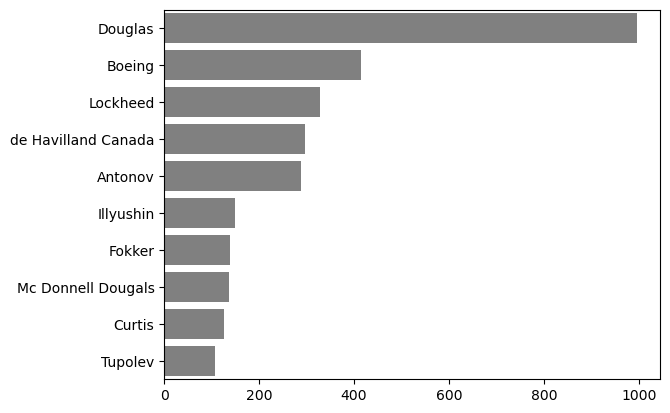

In [41]:
sn.barplot(x='manufacturer_c', y='manufacturer', data=AC_man_c, orient='h', color='grey')
plt.ylabel('')
plt.xlabel('')
plt.title('')
plt.show()

### Douglas was involved in the majority of accidents <br> Douglas DC-3 aircraft was involved in a really considerable amount of occurrences

# Operators 

In [35]:
operator_c = df.groupby("Operator").size().reset_index(name='operator_c')
operator_c = operator_c.sort_values(by='operator_c', ascending=False)
operator_c = operator_c.head(10)
operator_c

,Operator,operator_c
78,Aeroflot,260
1400,Military - U.S. Air Force,141
182,Air France,74
719,Deutsche Lufthansa,63
2146,United Air Lines,44
625,China National Aviation Corporation,43
1410,Military - U.S. Army Air Forces,43
1594,Pan American World Airways,41
349,American Airlines,38
2119,US Aerial Mail Service,35


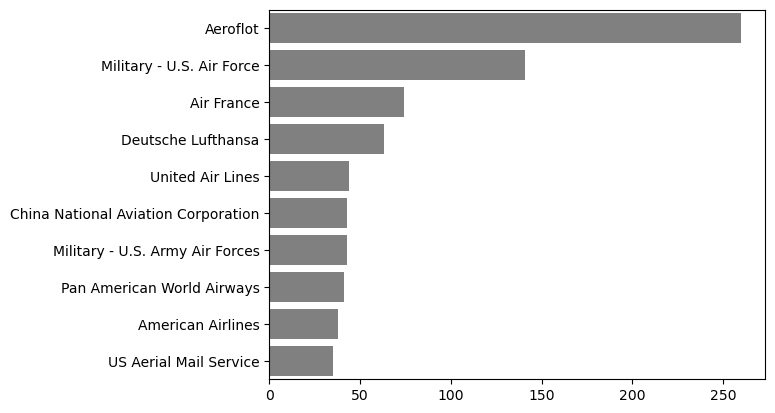

In [40]:
sn.barplot(x='operator_c', y='Operator', data=operator_c, orient='h', color='grey')
plt.ylabel('')
plt.xlabel('')
plt.title('')
plt.show()

### Lesson Learned: Do not fly Aeroflot! <br> U.S. Air Force comes in second as this contains records of WW2 accidents

# Types of Routes With More Accidents

In [45]:
df1 = df[~df.Origin.isin(['Unknown', 'Training'])]
Origin_c = df1.groupby("Origin").size().reset_index(name='Origin_c')
Origin_c = Origin_c.sort_values(by='Origin_c', ascending=False)
Origin_c = Origin_c.head(10)
Origin_c

,Origin,Origin_c
1263,"New York, NY",64
1362,Paris,51
1011,London,44
205,Bogata,40
1202,Moscow,40
1512,Rome,34
342,"Chicago, IL",33
1661,Sightseeing,31
1149,Miami,27
1611,Sao Paulo,26


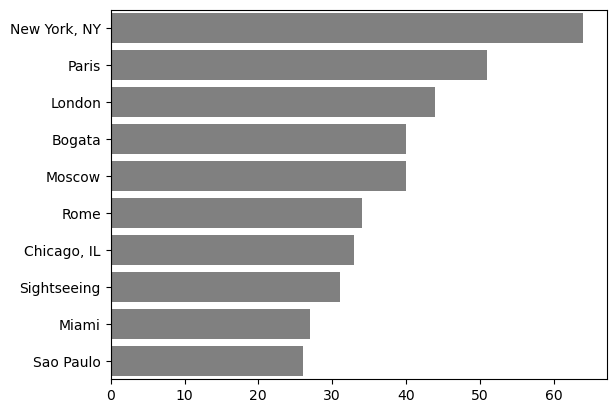

In [47]:
sn.barplot(x='Origin_c', y='Origin', data=Origin_c, orient='h', color='grey')
plt.ylabel('')
plt.xlabel('')
plt.title('')
plt.show()

### Flights originating from NY had 64 accidents